In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download aadyasingh55/twitter-emotion-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/aadyasingh55/twitter-emotion-classification-dataset
License(s): other
 90% 20.0M/22.3M [00:01<00:00, 16.5MB/s]
100% 22.3M/22.3M [00:01<00:00, 11.9MB/s]


In [ ]:
#unzip file
! unzip twitter-emotion-classification-dataset.zip

Archive:  twitter-emotion-classification-dataset.zip
  inflating: train-00000-of-00001.parquet  


0: sadness
1: joy
2: love
3: anger
4: fear
5: surprise

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from wordcloud import WordCloud
df = pd.read_parquet('/content/train-00000-of-00001.parquet')
df.head()

text  label
0  i feel awful about it too because it s my job ...      0
1                              im alone i feel awful      0
2  ive probably mentioned this before but i reall...      1
3           i was feeling a little low few days back      0
4  i beleive that i am much more sensitive to oth...      2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


<ipython-input-10-59c9d75d2ad6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'label_text', palette = 'inferno')


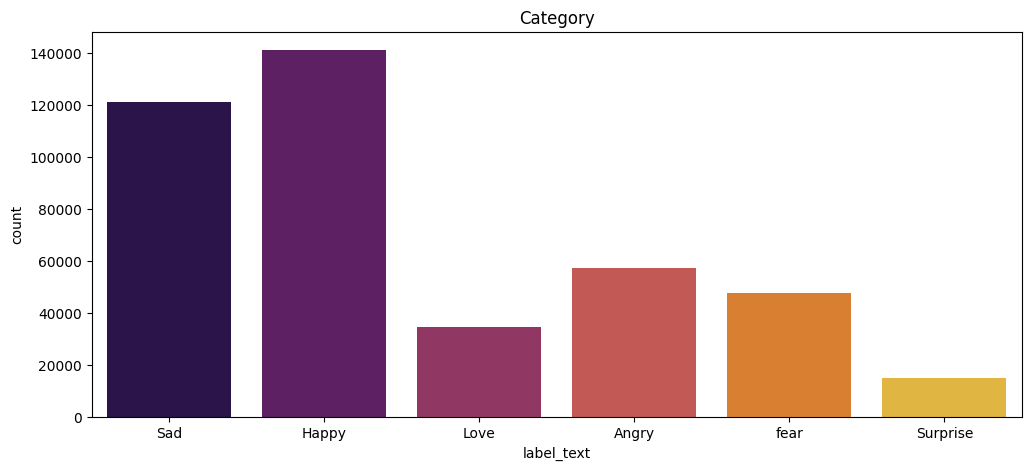

In [ ]:
# count the unique value
df['label_text'] = df['label'].replace({0:'Sad',
                                        1:'Happy',
                                        2:'Love',
                                        3:'Angry',
                                        4:'fear',
                                        5:'Surprise'})
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = 'label_text', palette = 'inferno')
plt.title("Category")
plt.tight_layout;

In [ ]:
# Label is not balance,let's see the percentage label
a = list(df['label_text'].unique())
for i in a:
    print("Percentage of",i,":", round((len(df[df['label_text']== i])/len(df))*100,2),"%")

Percentage of Sad : 29.07 %
Percentage of Happy : 33.84 %
Percentage of Love : 8.29 %
Percentage of Angry : 13.75 %
Percentage of fear : 11.45 %
Percentage of Surprise : 3.59 %


In [ ]:
df = df[df['label_text'].isin(['Sad','Happy','Angry','Surprise'])] # adjust with the case
df['label_text'].value_counts()

label_text
Happy       141067
Sad         121187
Angry        57317
Surprise     14972
Name: count, dtype: int64

<ipython-input-25-8ae88bf21e17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'label_text', palette = 'inferno')


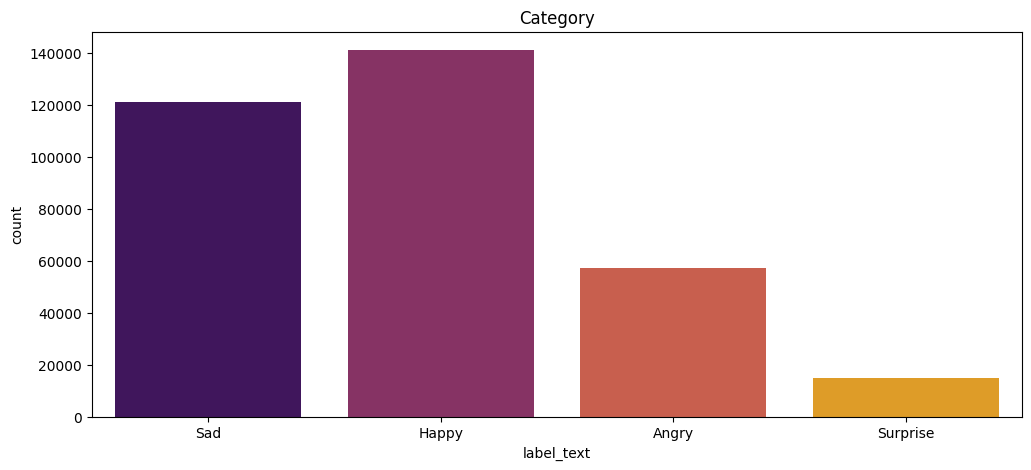

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = 'label_text', palette = 'inferno')
plt.title("Category")
plt.tight_layout;

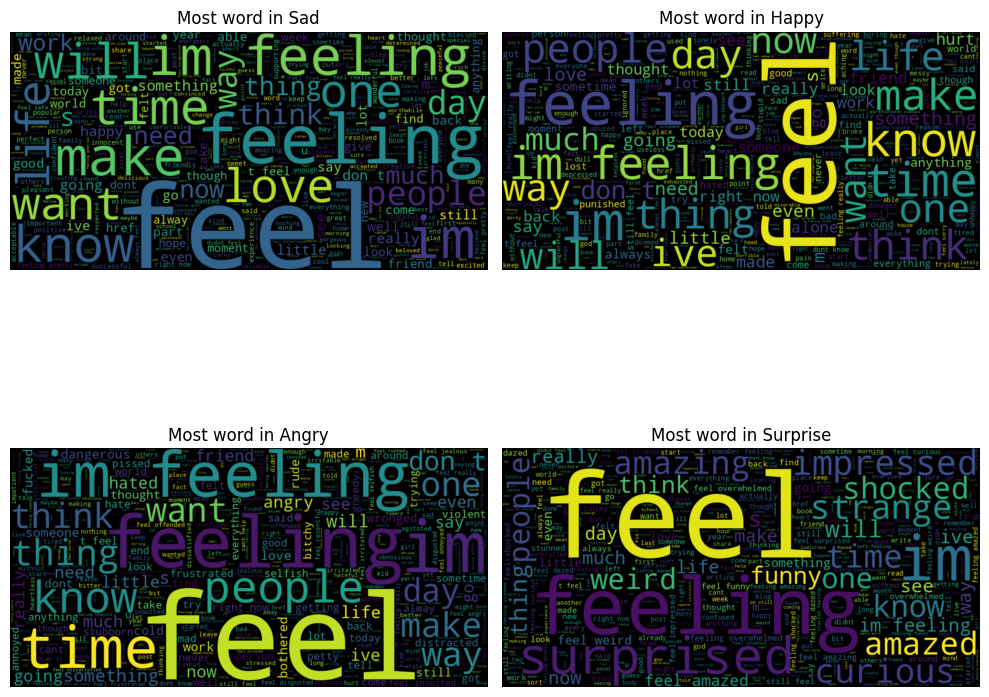

In [ ]:
# let's see common word for every categories
Happy = df[df['label_text']=='Happy']['text']
Sad = df[df['label_text']=='Sad']['text']
Angry = df[df['label_text']=='Angry']['text']
Surprise = df[df['label_text']=='Surprise']['text']
emotion = [Happy,Sad,Angry,Surprise]
plt.figure(figsize=(10,10))
list_emotion = list(df['label_text'].unique())
for i, x in enumerate(emotion):
  plt.subplot(2,2, i+1)
  WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
  category = WC.generate(x.str.cat(sep=' '))
  plt.imshow(category, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(f"Most word in {list_emotion[i]}")
plt.tight_layout()
plt.show()

In [ ]:
max_sample = df['label_text'].value_counts()['Surprise']
balanced_df = df.groupby('label_text').apply(lambda x: x.sample(n=max_sample,random_state = 42)).reset_index(drop=True)
balanced_df['label_text'].value_counts()

<ipython-input-14-06b96f5a3824>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('label_text').apply(lambda x: x.sample(n=max_sample,random_state = 42)).reset_index(drop=True)


label_text
Angry       14972
Happy       14972
Sad         14972
Surprise    14972
Name: count, dtype: int64

<ipython-input-15-5b6c2cbc5fa6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = balanced_df, x = 'label_text', palette = 'inferno')


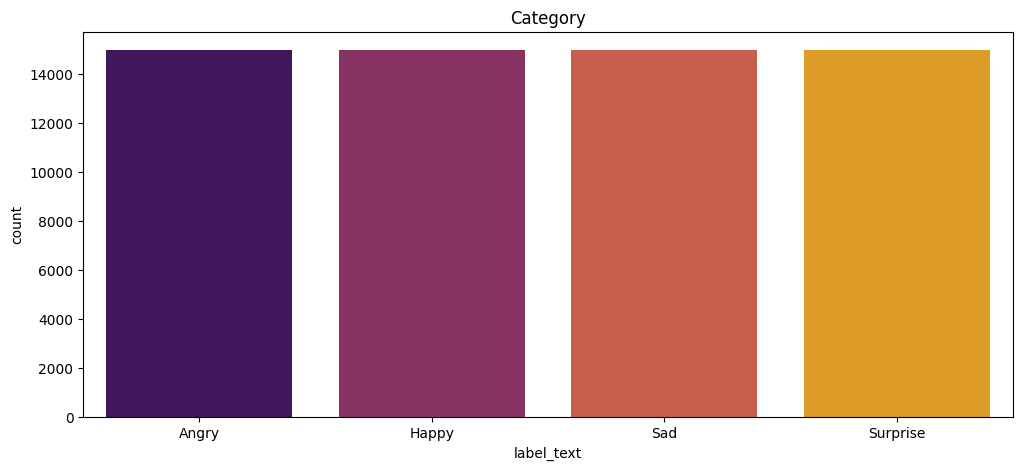

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data = balanced_df, x = 'label_text', palette = 'inferno')
plt.title("Category")
plt.tight_layout;

In [ ]:
x = balanced_df[['text','label_text']]
x

text label_text
0         i feel irritated and i kinda hate this feeling      Angry
1      id rather be home feeling violent and lonely i...      Angry
2      i suggest you wait to discuss this with them u...      Angry
3         i wrong to feel royally pissed off at all this      Angry
4      im so tierd of talking about him like theres h...      Angry
...                                                  ...        ...
59883           i feel amazing posted on a href http www   Surprise
59884  i gotta feeling and oprah was not only shocked...   Surprise
59885  i feel amazed as i watch these photos and foot...   Surprise
59886  i am asked early in the morning through an int...   Surprise
59887  i ask him feeling like im interviewing him but...   Surprise

[59888 rows x 2 columns]

## cleaning Text

In [ ]:
x['text'] = x['text'].apply(lambda x: x.lower())

<ipython-input-17-686c9096c1b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'] = x['text'].apply(lambda x: x.lower())


In [ ]:
import re
def remove_special_character(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text
x['text'] = x['text'].apply(remove_special_character)
x.head()

<ipython-input-18-ef5d236b52bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'] = x['text'].apply(remove_special_character)


text label_text
0     i feel irritated and i kinda hate this feeling      Angry
1  id rather be home feeling violent and lonely i...      Angry
2  i suggest you wait to discuss this with them u...      Angry
3     i wrong to feel royally pissed off at all this      Angry
4  im so tierd of talking about him like theres h...      Angry

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopword
def remove_stopword(text,  is_lower_case = False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword]
  filtered_text =' '.join(filtered_tokens)
  return filtered_text
x['text'] = x['text'].apply(remove_stopword)
x.head()

<ipython-input-20-1174da10f32d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'] = x['text'].apply(remove_stopword)


text label_text
0                  feel irritated kinda hate feeling      Angry
1  id rather home feeling violent lonely im tryin...      Angry
2        suggest wait discuss feeling less resentful      Angry
3                          wrong feel royally pissed      Angry
4  im tierd talking like theres hope hell care un...      Angry

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
def lemmatizer_text(text):
  lem = WordNetLemmatizer()
  text = ' '.join([lem.lemmatize(word) for word in text.split()])
  return text
x['text'] = x['text'].apply(lemmatizer_text)
encoder = LabelEncoder()
X = x['text'].to_numpy()
Y = encoder.fit_transform(x['label_text'].to_numpy())

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-21-c09865b2be76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'] = x['text'].apply(lemmatizer_text)


In [ ]:
encoder.classes_

array(['Angry', 'Happy', 'Sad', 'Surprise'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47910,)
(47910,)
(11978,)
(11978,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Langkah pertama: Vektorisasi teks
    ('classifier', XGBClassifier(random_state = 42))  # Langkah kedua: Klasifikasi
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2968
           1       0.96      0.95      0.95      2975
           2       0.97      0.91      0.94      3049
           3       0.97      1.00      0.98      2986

    accuracy                           0.96     11978
   macro avg       0.96      0.96      0.96     11978
weighted avg       0.96      0.96      0.96     11978



In [ ]:
import joblib
from google.colab import files
joblib.dump(pipeline,'emotion_model_classifier.pkl')
joblib.dump(encoder,'emotion_encoder.pkl')
files.download('emotion_model_classifier.pkl')
files.download('emotion_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cek = joblib.load('emotion_model_classifier.pkl')
encoder.inverse_transform(cek.predict(['it so good']))

array(['Happy'], dtype=object)